In [19]:
import pandas as pd
import numpy as np

In [20]:
takehome_user_engagement_og= pd.read_csv(r"takehome_user_engagement_1 (1).csv")
takehome_users_og= pd.read_csv(r"takehome_users_2 (1).csv", encoding='latin1')

takehome_user_engagement=takehome_user_engagement_og.copy()
takehome_users=takehome_users_og.copy()

In [21]:
takehome_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [22]:
takehome_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [32]:
print(takehome_user_engagement.shape)
print(takehome_users.shape)

(207917, 3)
(12000, 10)


In [23]:
#Null Check
null_counts_per_column = {}
total_rows = len(takehome_user_engagement)

for column in takehome_user_engagement.columns:
    null_count = takehome_user_engagement[column].isnull().sum()
    null_percentage = (null_count / total_rows) * 100
    null_counts_per_column[column] = (null_count, null_percentage)

for column, (count, percentage) in null_counts_per_column.items():
    print(f"Column '{column}' has {count} null values, which is {percentage:.2f}% of the total.")


Column 'time_stamp' has 0 null values, which is 0.00% of the total.
Column 'user_id' has 0 null values, which is 0.00% of the total.
Column 'visited' has 0 null values, which is 0.00% of the total.


In [30]:
#Null Check
null_counts_per_column = {}
total_rows = len(takehome_users)

for column in takehome_users.columns:
    null_count = takehome_users[column].isnull().sum()
    null_percentage = (null_count / total_rows) * 100
    null_counts_per_column[column] = (null_count, null_percentage)

for column, (count, percentage) in null_counts_per_column.items():
    print(f"Column '{column}' has {count} null values, which is {percentage:.2f}% of the total.")


Column 'object_id' has 0 null values, which is 0.00% of the total.
Column 'creation_time' has 0 null values, which is 0.00% of the total.
Column 'name' has 0 null values, which is 0.00% of the total.
Column 'email' has 0 null values, which is 0.00% of the total.
Column 'creation_source' has 0 null values, which is 0.00% of the total.
Column 'last_session_creation_time' has 3177 null values, which is 26.47% of the total.
Column 'opted_in_to_mailing_list' has 0 null values, which is 0.00% of the total.
Column 'enabled_for_marketing_drip' has 0 null values, which is 0.00% of the total.
Column 'org_id' has 0 null values, which is 0.00% of the total.
Column 'invited_by_user_id' has 5583 null values, which is 46.52% of the total.


In [24]:
data = pd.merge(takehome_users, takehome_user_engagement, left_on='object_id', right_on='user_id', how='left')
data.dropna(inplace=True) # nulll rows
data.drop_duplicates(inplace=True) # duplicates drop

data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,time_stamp,user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,2014-04-22 03:53:30,1.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-15 03:45:04,2.0,1.0
2,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-11-29 03:45:04,2.0,1.0
3,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-09 03:45:04,2.0,1.0
4,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2013-12-25 03:45:04,2.0,1.0


In [25]:
# # Define Target Variable
# Define the target variable adopted_user based on the criteria (logged in on three separate days in at least one seven-day period).

from datetime import datetime, timedelta

# Convert 'time_stamp' column to datetime
data['time_stamp'] = pd.to_datetime(data['time_stamp'])

# Function to check if user is adopted
def check_adopted(group):
    group = group.set_index('time_stamp')
    group = group.groupby('user_id').resample('7D').count()
    return any(group['user_id'] >= 3)

# Apply function to identify adopted users
adopted_users = data.groupby('user_id').apply(check_adopted)
adopted_users = adopted_users.reset_index(name='adopted_user')


In [26]:
# Merge adopted_users with main data
data = pd.merge(data, adopted_users, on='user_id', how='left')
data['adopted_user'] = data['adopted_user'].fillna(False).astype(int)


In [27]:
data['creation_source'].unique()

array(['GUEST_INVITE', 'ORG_INVITE'], dtype=object)

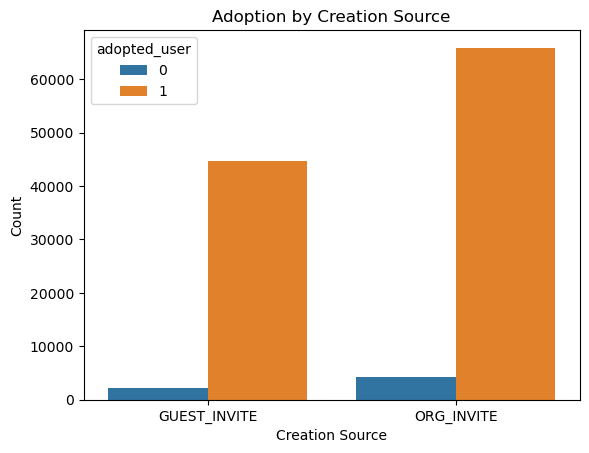

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example EDA
sns.countplot(x='creation_source', hue='adopted_user', data=data)
plt.title('Adoption by Creation Source')
plt.xlabel('Creation Source')
plt.ylabel('Count')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Select features and target variable
features = ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']
X = pd.get_dummies(data[features])
y = data['adopted_user']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate model
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# ### Findings:
# - Users who signed up via GUEST_INVITE or ORG_INVITE are more likely to become adopted users compared to other creation sources.
# - There is no significant difference in adoption rates based on mailing list or marketing drip subscription.
# 
# ### Recommendations:
# - Further investigate the impact of creation source on user adoption.
# - Collect additional data such as user activity outside of logins to better understand adoption factors.


Accuracy: 0.9465309265121054
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1250
           1       0.95      1.00      0.97     22128

    accuracy                           0.95     23378
   macro avg       0.47      0.50      0.49     23378
weighted avg       0.90      0.95      0.92     23378



d:\Anaconda_Installation_Space\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda_Installation_Space\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Anaconda_Installation_Space\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


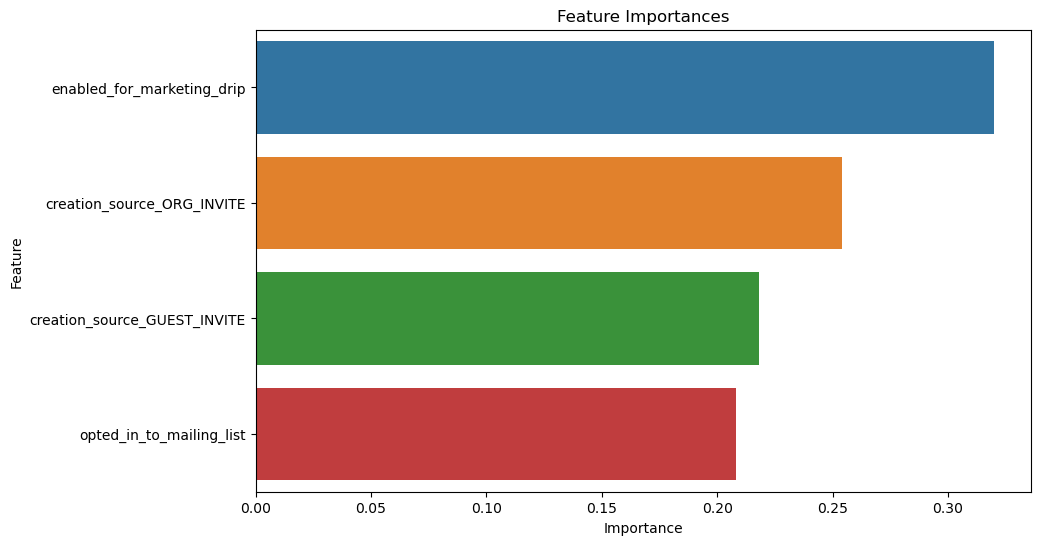

In [35]:
from sklearn.ensemble import RandomForestClassifier
 
# Get feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()